## Import libraries & data

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

In [1]:
#!pip install textstat

In [2]:
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import missingno as msno
# from google.colab import data_table
from tabulate import tabulate
import scipy.stats as st
import matplotlib as mpl
import matplotlib.patches as mpl_patches
import matplotlib.cm as cm
import matplotlib.lines as mlines
import re
import nltk
import spacy
from collections import defaultdict,Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer  
from textblob import TextBlob
from textstat import flesch_reading_ease
tqdm.pandas()
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')  
# nltk.download('vader_lexicon')

In [4]:
final_df = pd.read_csv('C:/Users/prash/Desktop/New_now100/data/final_df_preprocessed_2021111201.csv')

In [5]:
final_df.sample(5)

,correct,incorrect,correct_char_count,incorrect_char_count,correct_word_count,incorrect_word_count
2479,"Hue contains of colour to convert, in the rang...","Hue component of Color to convert, in the rang...",58,58,10,10
5475,Collecting data about individuals can be block...,Collecting data about individual users can be ...,151,157,22,23
1076,"I could feel its heart bleeding, poor thing an...","I could feel its heart beating, poor thing and...",87,84,18,18
6321,"minutes came and went, soon I watched a record...","minutes came and went, soon I heard a recordin...",107,104,22,22
7578,why generation of power station always a multi...,why generation of power stations always a mult...,96,100,19,19


In [6]:
final_df.shape

(9944, 6)

### Adding length features

In [7]:
final_df['correct_char_count'] = final_df['correct'].astype('str').apply(lambda x:len(x))
final_df['incorrect_char_count'] = final_df['incorrect'].astype('str').apply(lambda x:len(x))

In [8]:
final_df['correct_word_count'] = final_df['correct'].astype('str').apply(lambda x:len(x.split()))
final_df['incorrect_word_count'] = final_df['incorrect'].astype('str').apply(lambda x:len(x.split()))

In [9]:
final_df.sample(5)

,correct,incorrect,correct_char_count,incorrect_char_count,correct_word_count,incorrect_word_count
8021,"Find ideal Florida Auto Car Wash, Automatic Ca...","Find your ideal Florida Auto Wash, Automatic C...",98,99,16,16
8322,Mega fortune mega is a progressive slots this ...,Mega Fortune Mega is a progressive slots jackp...,152,233,28,43
2345,Most railway stations are deserted these days ...,Most railway stations are deserted these days ...,136,134,22,21
8534,é´ How to accept?,How do you set up hosting?,18,26,4,6
340,With the perfect good blend of looking lightwe...,With the perfect blend of lightweight and toug...,219,202,40,34


## Univariate Analysis(KDE Plots)

In [10]:
def plot_univariate(df,feature_name):
    '''Plots KDE plot of specified feature name from dataframe'''
    random_color = (random.random(), random.random(), random.random())
    df.plot(kind='kde',y=feature_name,figsize=(25,5),grid=True,color=random_color)
    plt.title(f'KDE-{feature_name.replace("_"," ")}')
    plt.show()

In [11]:
def show_percentiles(df,feature_name,quantile_range,quantile_incr):
    '''shows quantiles  of specified feature name from dataframe in specified range'''
    quantiles = np.arange(quantile_range[0],quantile_range[1],quantile_incr)
    quant_array = [np.percentile(df[feature_name] , i) for i in quantiles]
    return pd.DataFrame(quant_array,columns=[feature_name]).set_index(quantiles).transpose()

### Character Count

#### Correct Sentences


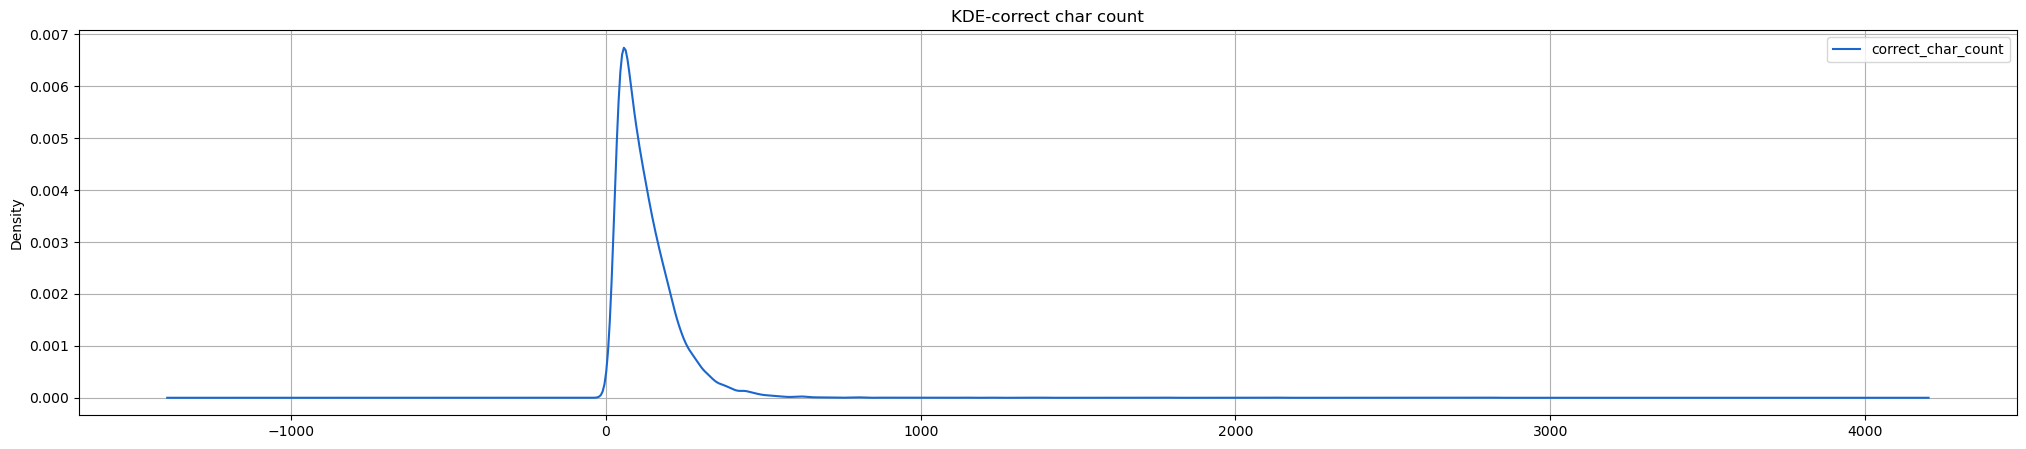

In [12]:
plot_univariate(final_df,'correct_char_count')

In [13]:
final_df['correct_char_count'].describe()

count    9944.000000
mean      127.583266
std       100.478270
min         5.000000
25%        60.000000
50%       103.000000
75%       167.000000
max      2803.000000
Name: correct_char_count, dtype: float64

In [14]:
show_percentiles(final_df,'correct_char_count',(0,101),5)

,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
correct_char_count,5.0,33.0,40.0,47.0,54.0,60.0,67.0,75.0,84.0,94.0,...,113.0,125.0,137.0,151.0,167.0,186.0,209.0,243.0,300.0,2803.0


In [15]:
show_percentiles(final_df,'correct_char_count',(90,101),1)

,90,91,92,93,94,95,96,97,98,99,100
correct_char_count,243.0,251.0,262.56,273.0,286.0,300.0,321.0,346.0,384.0,448.57,2803.0


In [16]:
show_percentiles(final_df,'correct_char_count',(99.1,100),0.1)

,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100.0
correct_char_count,458.052,470.912,479.399,496.736,517.855,544.824,600.855,637.0,808.342,2803.0


In [17]:
show_percentiles(final_df,'correct_char_count',(99.9,100),0.01)

,99.90,99.91,99.92,99.93,99.94,99.95,99.96,99.97,99.98,99.99
correct_char_count,808.342,817.6936,887.9608,931.5137,996.8906,1137.394,1222.6252,1384.7374,1776.0014,2126.876


#### Incorrect Sentences

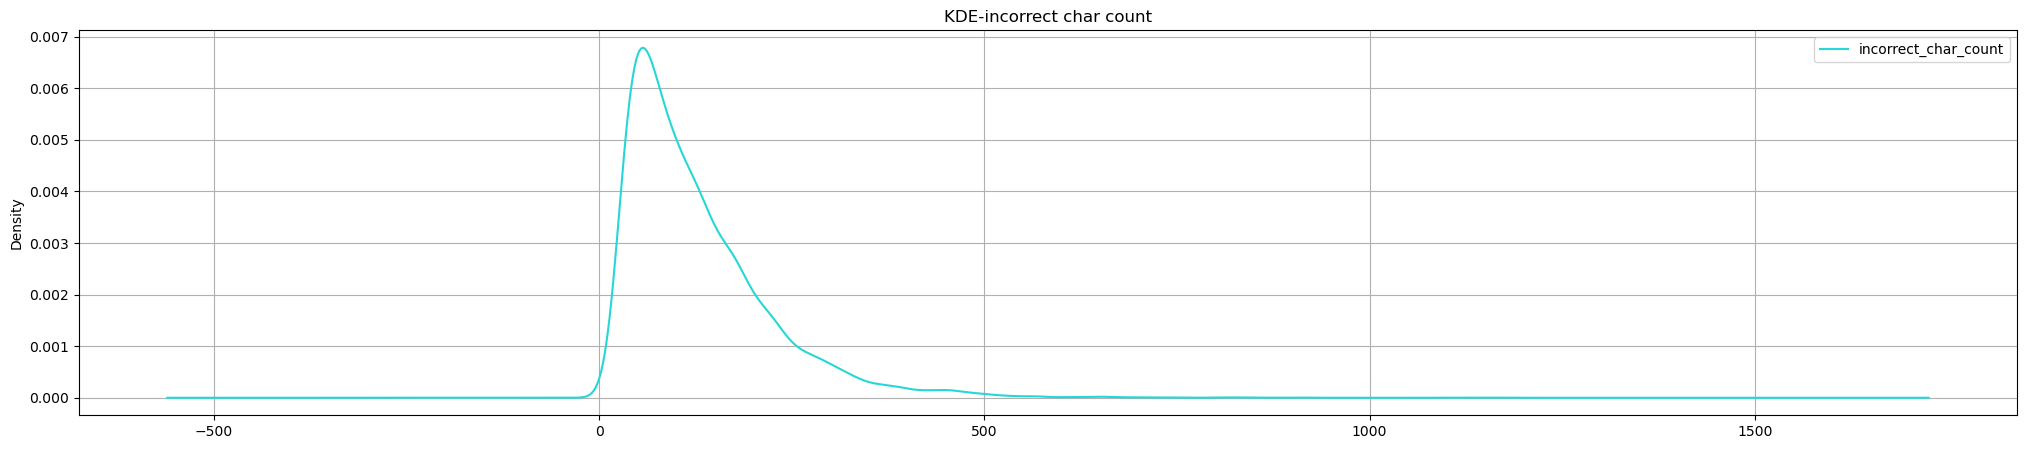

In [18]:
plot_univariate(final_df,'incorrect_char_count')

In [19]:
final_df['incorrect_char_count'].describe()

count    9944.000000
mean      128.187148
std        93.922681
min        11.000000
25%        61.000000
50%       103.000000
75%       169.000000
max      1154.000000
Name: incorrect_char_count, dtype: float64

In [20]:
show_percentiles(final_df,'incorrect_char_count',(0,101),5)

,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
incorrect_char_count,11.0,33.0,40.0,47.0,54.0,61.0,68.0,75.0,84.0,94.0,...,114.0,126.0,137.0,153.0,169.0,187.0,212.0,245.0,307.0,1154.0


In [21]:
show_percentiles(final_df,'incorrect_char_count',(90,101),1)

,90,91,92,93,94,95,96,97,98,99,100
incorrect_char_count,245.0,256.13,266.0,280.0,291.0,307.0,325.28,354.0,395.0,461.0,1154.0


In [22]:
show_percentiles(final_df,'incorrect_char_count',(99.1,100),0.1)

,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100.0
incorrect_char_count,466.0,474.456,488.399,497.0,510.855,534.14,568.513,642.57,715.798,1154.0


In [23]:
show_percentiles(final_df,'incorrect_char_count',(99.9,100),0.01)

,99.90,99.91,99.92,99.93,99.94,99.95,99.96,99.97,99.98,99.99
incorrect_char_count,715.798,729.9234,747.2736,755.0748,805.4788,819.2565,828.4104,846.8721,897.1026,907.4136


### Word Count

#### Correct Sentences

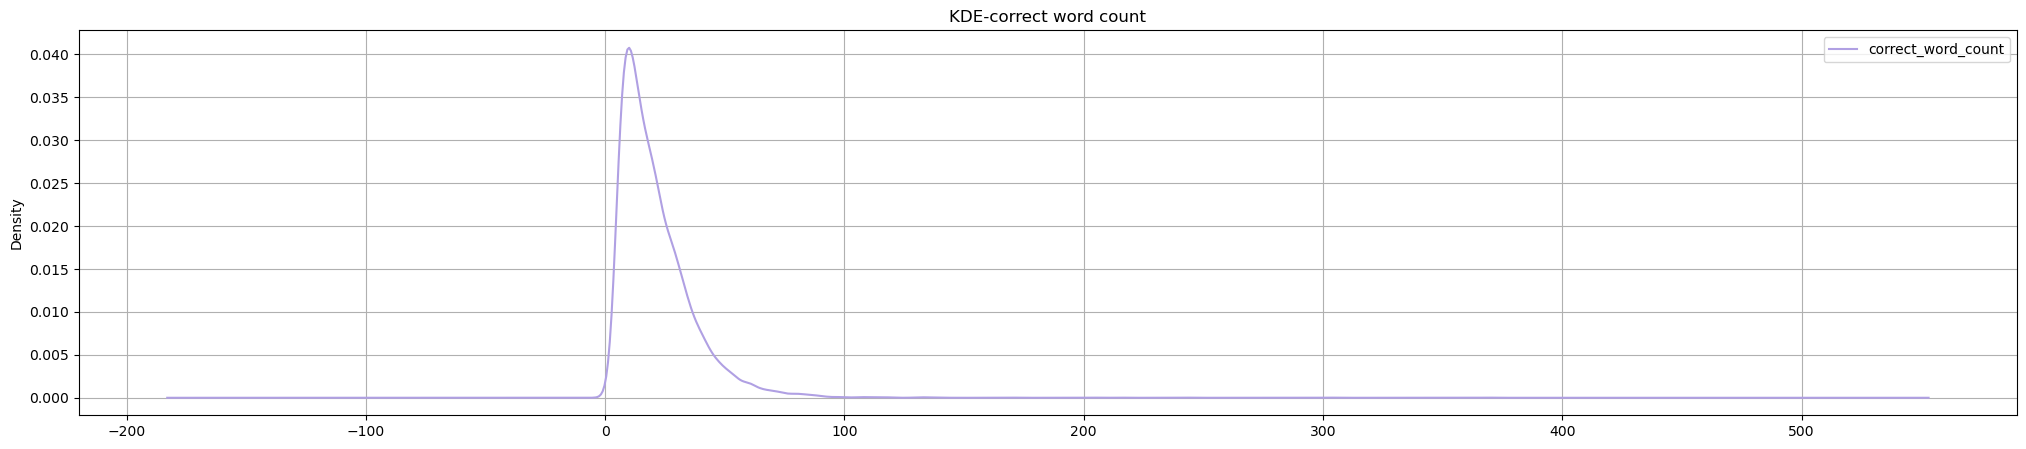

In [24]:
plot_univariate(final_df,'correct_word_count')

In [25]:
final_df['correct_word_count'].describe()

count    9944.000000
mean       21.327132
std        15.870582
min         1.000000
25%        10.000000
50%        17.000000
75%        28.000000
max       369.000000
Name: correct_word_count, dtype: float64

In [26]:
show_percentiles(final_df,'correct_word_count',(0,101),5)

,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
correct_word_count,1.0,6.0,7.0,8.0,9.0,10.0,12.0,13.0,14.0,16.0,...,19.0,21.0,23.0,25.0,28.0,31.0,34.0,40.0,50.0,369.0


In [27]:
show_percentiles(final_df,'correct_word_count',(90,101),1)

,90,91,92,93,94,95,96,97,98,99,100
correct_word_count,40.0,41.0,43.0,45.0,47.0,50.0,53.0,57.0,62.0,73.57,369.0


In [28]:
show_percentiles(final_df,'correct_word_count',(99.1,100),0.1)

,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100.0
correct_word_count,75.513,78.0,80.0,82.0,85.0,87.0,92.171,107.114,130.114,369.0


In [29]:
show_percentiles(final_df,'correct_word_count',(99.9,100),0.01)

,99.90,99.91,99.92,99.93,99.94,99.95,99.96,99.97,99.98,99.99
correct_word_count,130.114,132.0513,133.0456,134.2394,141.026,170.969,204.2508,215.4788,243.684,303.3762


#### Inorrect Sentences

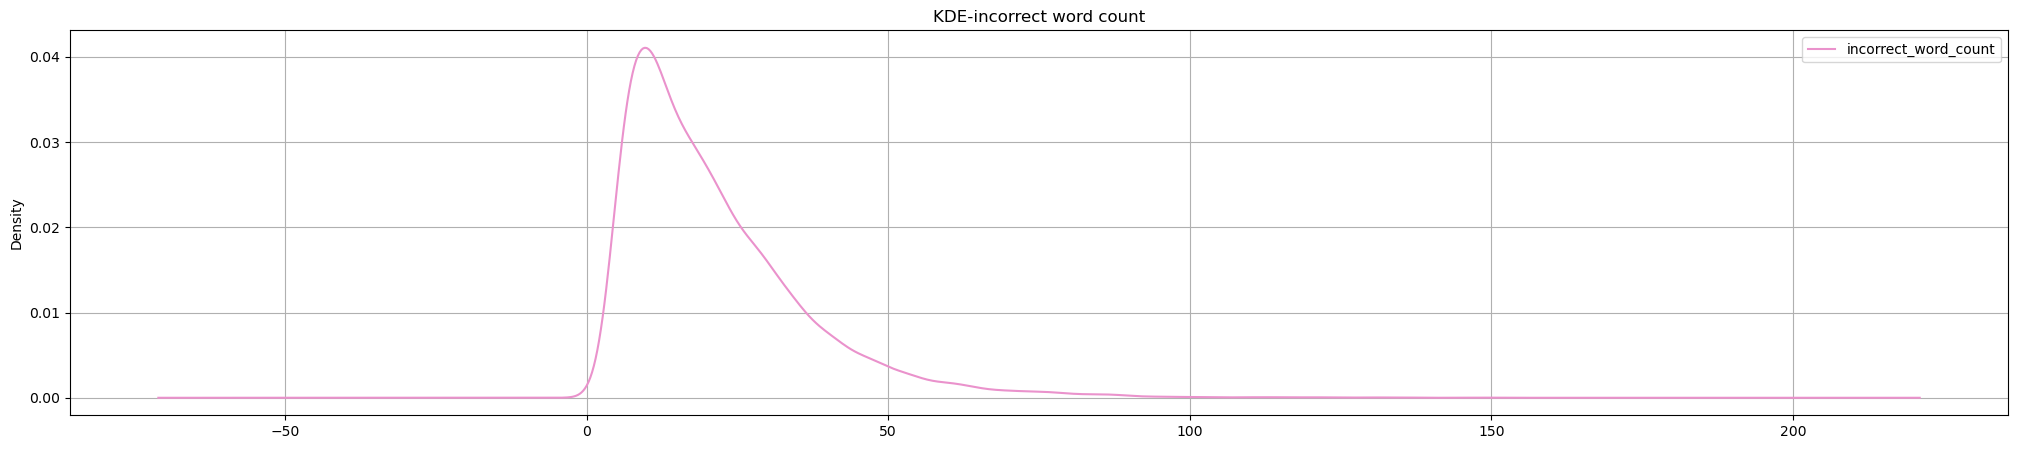

In [30]:
plot_univariate(final_df,'incorrect_word_count')

In [31]:
final_df['incorrect_word_count'].describe()

count    9944.000000
mean       21.339602
std        15.102866
min         2.000000
25%        10.000000
50%        17.000000
75%        28.000000
max       148.000000
Name: incorrect_word_count, dtype: float64

In [32]:
show_percentiles(final_df,'incorrect_word_count',(0,101),5)

,0,5,10,15,20,25,30,35,40,45,...,55,60,65,70,75,80,85,90,95,100
incorrect_word_count,2.0,6.0,7.0,8.0,9.0,10.0,12.0,13.0,14.0,16.0,...,19.0,21.0,23.0,25.0,28.0,31.0,35.0,41.0,50.0,148.0


In [33]:
show_percentiles(final_df,'incorrect_word_count',(90,101),1)

,90,91,92,93,94,95,96,97,98,99,100
incorrect_word_count,41.0,42.0,44.0,46.0,48.0,50.0,53.0,58.0,64.0,75.0,148.0


In [34]:
show_percentiles(final_df,'incorrect_word_count',(99.1,100),0.1)

,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100.0
incorrect_word_count,76.513,78.0,80.0,83.0,85.0,88.0,91.171,99.114,114.0,148.0


In [35]:
show_percentiles(final_df,'incorrect_word_count',(99.9,100),0.01)

,99.90,99.91,99.92,99.93,99.94,99.95,99.96,99.97,99.98,99.99
incorrect_word_count,114.0,114.2052,118.0912,120.0399,121.0684,123.171,129.0228,130.0855,135.0,135.0741


### Observations

1.   The character distriution for correct and incorrect senrtences shows mostly character lenth is between 50 to 80.
2.  The word count distribution tells most sentences are having 12 to 37 words.
3.  The distributions are  heavily skewed and there are extreme outliers present. 






## Bivariate Analysis(Scatter Plots)

In [36]:
def plot_scatter(df,feat_1,feat_2,title):
    fig,axs = plt.subplots(figsize=(10,10))
    x = sorted(list(df[feat_1]))
    y = sorted(list(df[feat_2]))
    random_color = (random.random(), random.random(), random.random())

    axs.scatter(x,y,marker=".",label=feat_1,color=random_color)
    line = mlines.Line2D([0, 1], [0, 1], color='black',linestyle=':',label='Normal Line')
    transform = axs.transAxes
    line.set_transform(transform)
    axs.add_line(line)
    axs.set_ylabel(feat_2)
    axs.grid()
    axs.set_xlabel(feat_1)
    axs.annotate(f"Correlation Score:{round((np.corrcoef(x,y)[0][1]),4)}", xy=(0.7, 0.5), xycoords='axes fraction',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center', fontsize=16)
    if title:
        plt.title(title)
    plt.show()

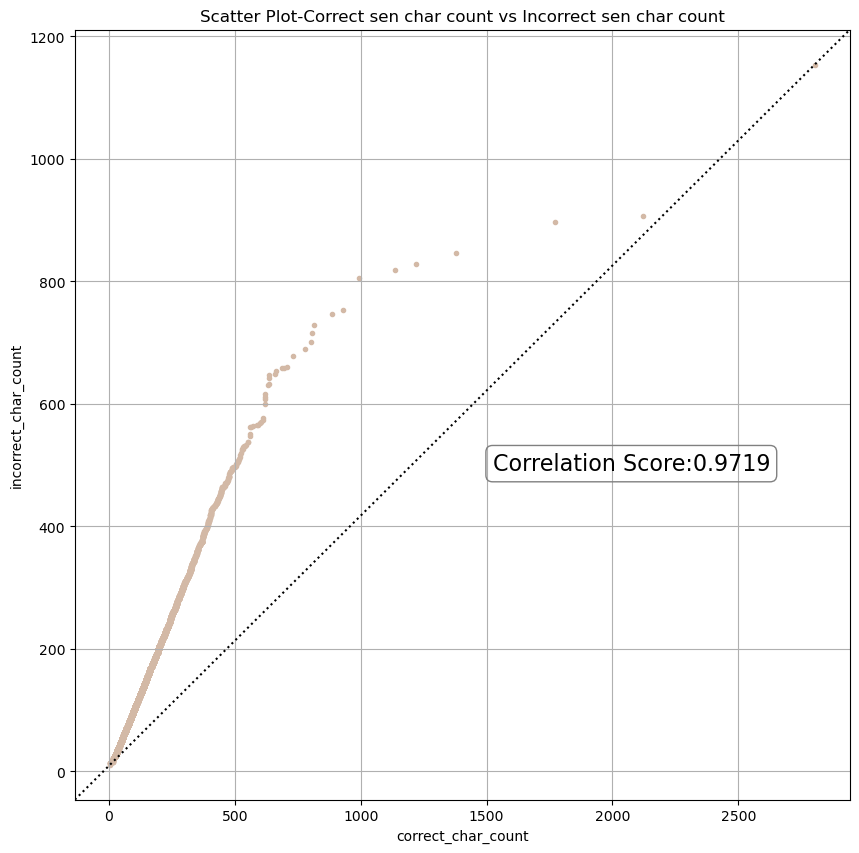

In [37]:
plot_scatter(final_df,'correct_char_count','incorrect_char_count',title='Scatter Plot-Correct sen char count vs Incorrect sen char count')

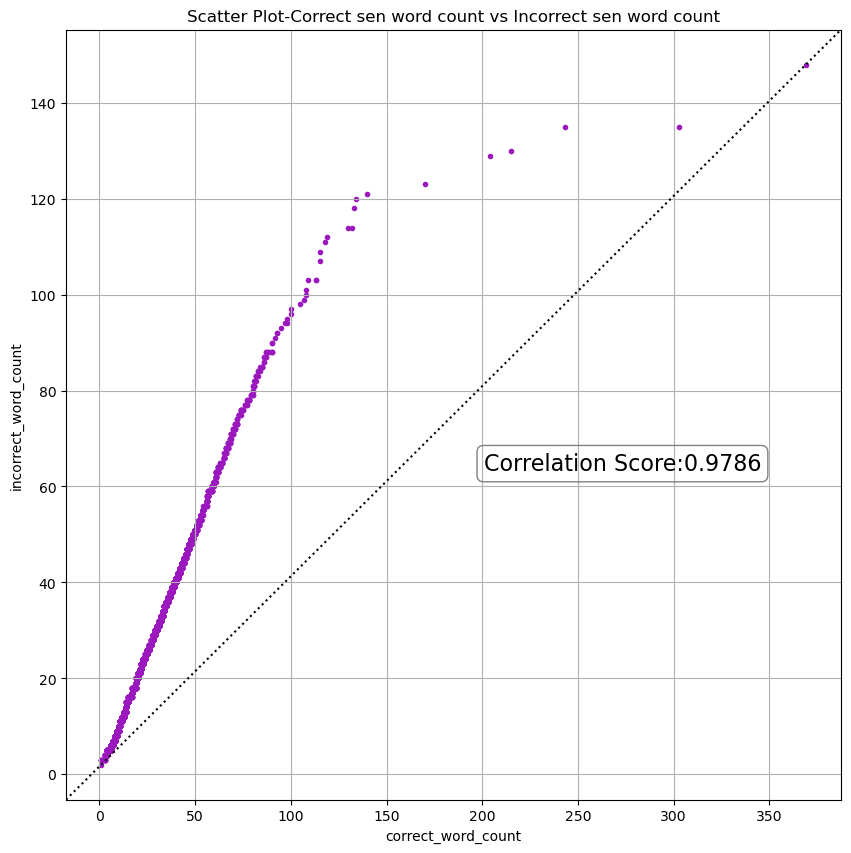

In [38]:
plot_scatter(final_df,'correct_word_count','incorrect_word_count','Scatter Plot-Correct sen word count vs Incorrect sen word count')

### Observations

1.   The character lenths and word counts for correct and incorrect sentences shows a very linear correlation with each other which tells distributions for correct and incorrect senteces are closely similar to each other.
3. Prima facie, we can state that there are not heavy edits made while correcting the sentence. 






## Stopword Analysis

In [39]:
stop=set(stopwords.words('english'))

In [40]:
#https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

def plot_top_stopwords(text,n_top=10,title=None):
    new= text.str.split()
    new= new.values.tolist()
    corpus=[word for i in new for word in i]

    stopword_dict=defaultdict(int)
    for word in corpus:
        if word in stop:
            stopword_dict[word]+=1

    df = pd.DataFrame()
    df['word'] = stopword_dict.keys()
    df['frequency'] = stopword_dict.values()
    df['percentage'] = df['frequency']*100/df['frequency'].sum()
    df = df.sort_values('frequency',ascending=False)
    df = df.iloc[:n_top]
    fig, ax = plt.subplots(figsize=(25,n_top/2))
    ax = sns.barplot(x = "frequency", y = "word",data=df, palette="nipy_spectral_r",orient='h')
    for i,p in enumerate(ax.patches):
        width = p.get_width()    # get bar length
        ax.text(width + 1,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                ' {:1.0f}'.format(width)+' ('+str(round(df['percentage'].iloc[i],2))+'%)', # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment
    ax.set_xlim(xmin=0.0, xmax=round(max(df['frequency']),-4)*1.1)
    if title:
        plt.title(title)
    plt.show()

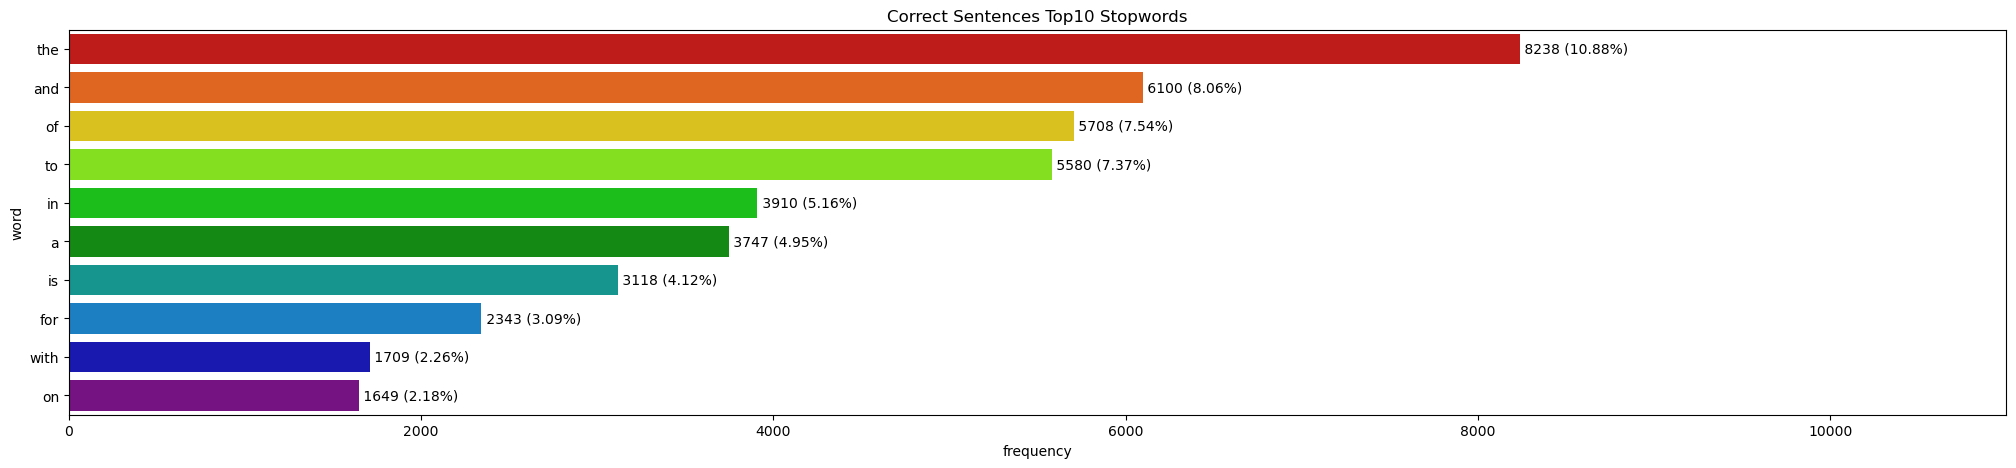

In [41]:
plot_top_stopwords(final_df['correct'],title='Correct Sentences Top10 Stopwords')

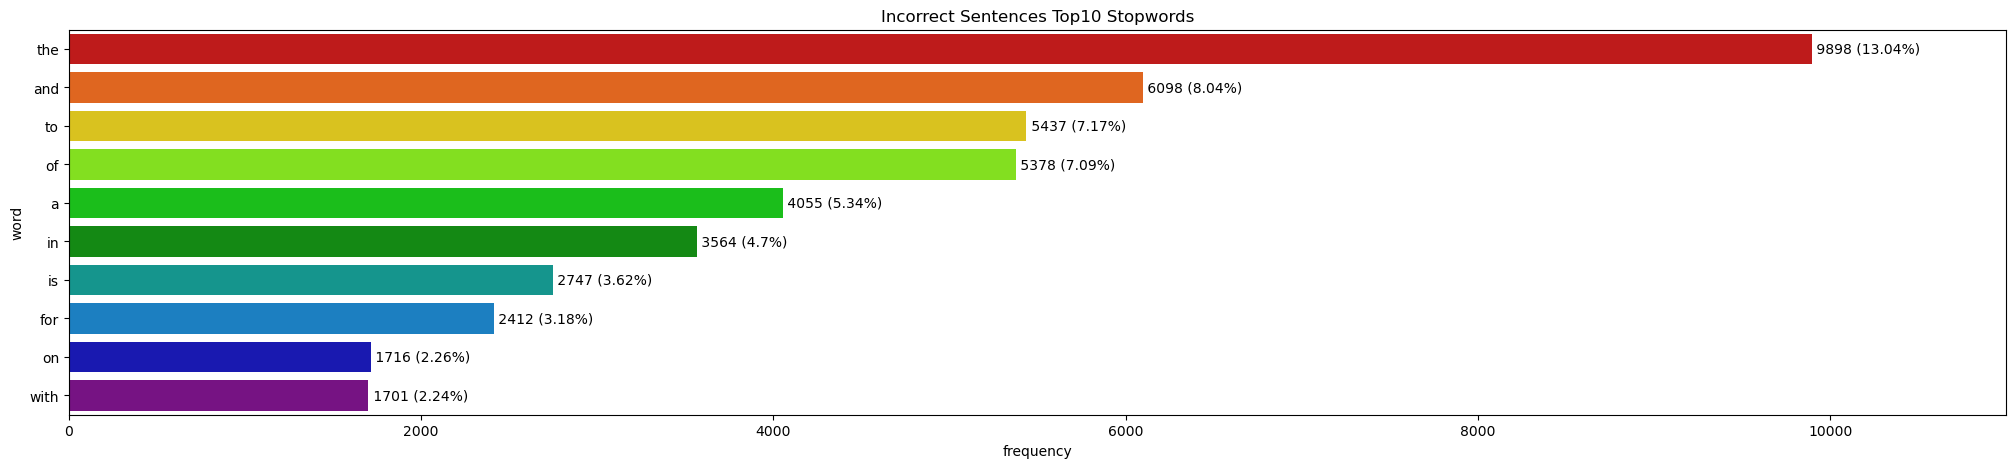

In [42]:
plot_top_stopwords(final_df['incorrect'].astype(str),title='Incorrect Sentences Top10 Stopwords')

### Observations

1.   Around 46% of stopwords are 'to','the','is','a','and','in','of','for','on' and 'with' where the distribution lies from 2.57% to 7.96%


## Wordcloud

In [43]:
def generate_wordcloud(text):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in tqdm(text):
        words=[w for w in word_tokenize(news) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

In [44]:
def plot_wordcloud(corpus,title=None):
    wordcloud = WordCloud(background_color='white',stopwords=set(STOPWORDS),
                          max_words=100,max_font_size=30,scale=3,random_state=1)
    wordcloud=wordcloud.generate(str(corpus))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    if title:
        plt.title(title)
    plt.show()

In [45]:
correct_sen_wordcloud = generate_wordcloud(final_df['correct'])

100%|████████████████████████████████████████████████████████████████████████████| 9944/9944 [00:03<00:00, 2730.57it/s]


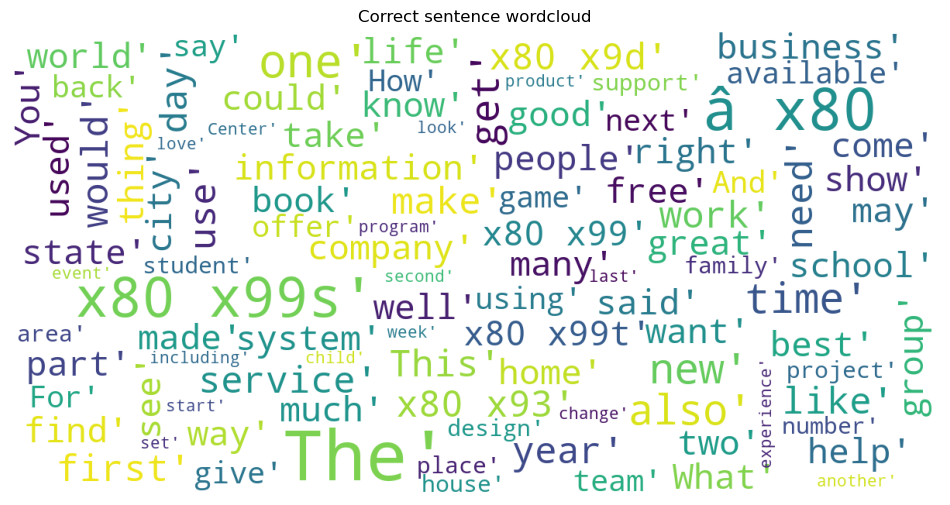

In [46]:
plot_wordcloud(correct_sen_wordcloud,'Correct sentence wordcloud')

In [47]:
incorrect_sen_corpus = generate_wordcloud(final_df['incorrect'].astype(str))

100%|████████████████████████████████████████████████████████████████████████████| 9944/9944 [00:02<00:00, 4140.18it/s]


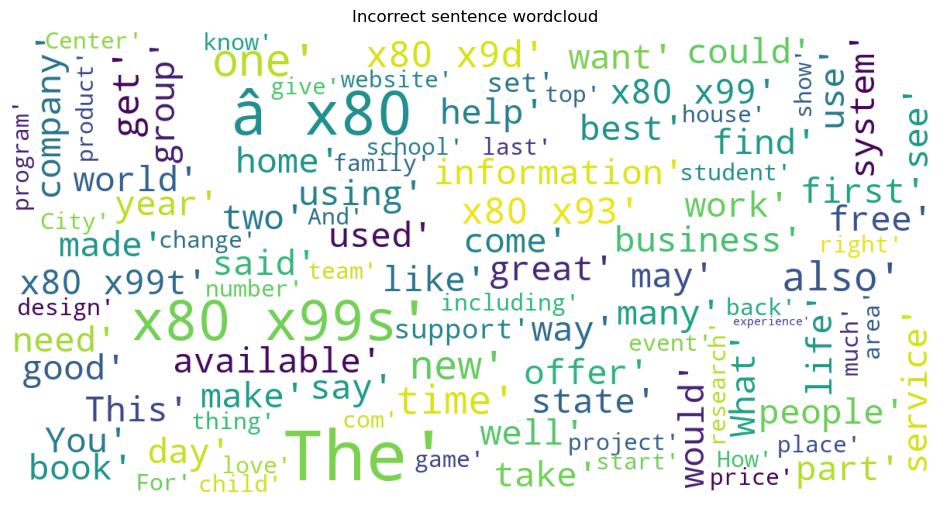

In [48]:
plot_wordcloud(incorrect_sen_corpus,'Incorrect sentence wordcloud')

### Observations


1. We can observe words like "The","x80","x99s", etc are frequently used in Correct & Incorrect Sentence



## Sentiment analysis

In [49]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [50]:
final_df['correct_sen_polarity_score'] = final_df['correct'].apply(polarity)
final_df['incorrect_sen_polarity_score'] = final_df['incorrect'].astype(str).apply(polarity)

In [51]:
def sentiment(x):
    if x<0:
        return 'Negative'
    elif x==0:
        return 'Neutral'
    else:
        return 'Positive'

In [52]:
final_df['correct_sen_polarity'] = final_df['correct_sen_polarity_score'].apply(sentiment)
final_df['incorrect_sen_polarity'] = final_df['incorrect_sen_polarity_score'].apply(sentiment)

In [53]:
def plot_polarity(polarity,title=None):
    fig,ax = plt.subplots(figsize =(10, 7))
    labels_Class_Disb = polarity.value_counts().index
    sizes_Class_Disb = polarity.value_counts()
    pcts_Class_Disb = [f'{l}-{s} Points \n({s*100/sum(sizes_Class_Disb):.2f}%)' for s,l in zip(sizes_Class_Disb, labels_Class_Disb)] 
    ax.pie(sizes_Class_Disb, labels = pcts_Class_Disb,startangle = 90, 
        explode=(0.05,0.05,0.05),colors = ('gray','#2a9d8f','#e76f51',), textprops = {"fontsize":12} )
    if title:
        plt.suptitle(title ,fontsize = 15)
    plt.title(f'(No Of Data Points:{sum(sizes_Class_Disb)}) ', fontsize = 12)
    plt.show()

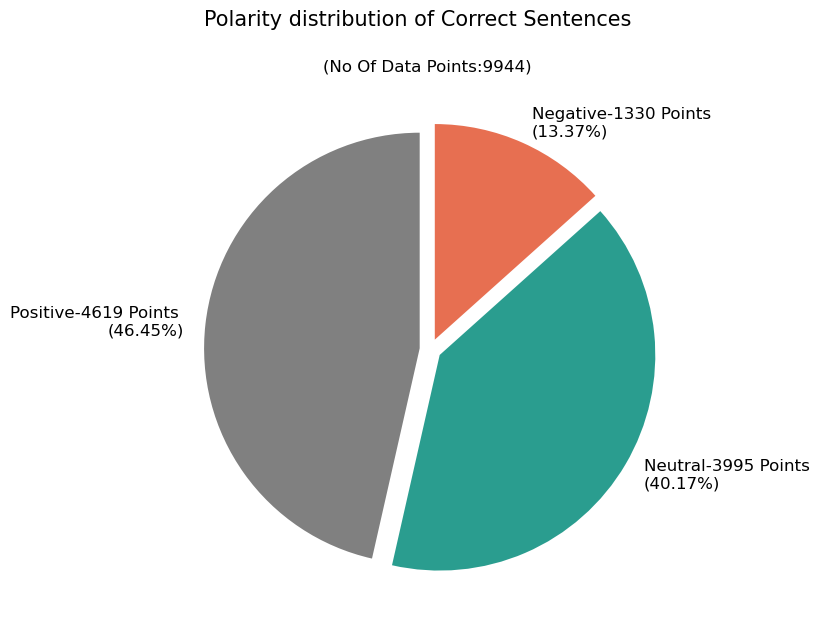

In [54]:
plot_polarity(final_df['correct_sen_polarity'],'Polarity distribution of Correct Sentences')

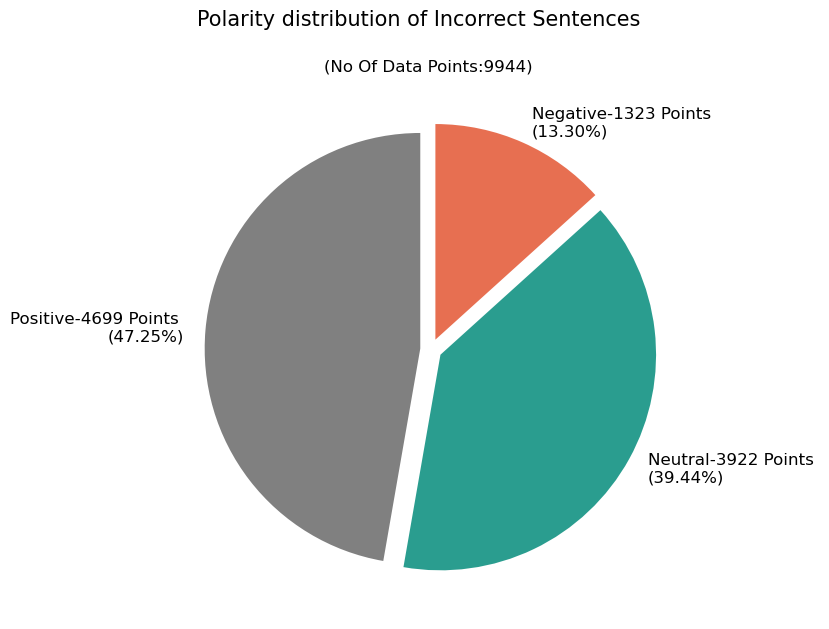

In [55]:
plot_polarity(final_df['incorrect_sen_polarity'],'Polarity distribution of Incorrect Sentences')

## Text complexity using Flesch Reading Ease (FRE)
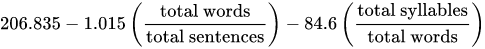

Higher scores indicate material that is easier to read,
lower numbers mark harder-to-read passages:


<table class="wikitable" border="1">

<tbody><tr>
<th>Score
</th>
<th>School level (<a href="/wiki/Education_in_the_United_States" title="Education in the United States">US</a>)
</th>
<th>Notes
</th></tr>
<tr>
<td>100.00–90.00
</td>
<td>5th grade
</td>
<td>Very easy to read. Easily understood by an average 11-year-old student.
</td></tr>
<tr>
<td>90.0–80.0
</td>
<td>6th grade
</td>
<td>Easy to read. Conversational English for consumers.
</td></tr>
<tr>
<td>80.0–70.0
</td>
<td>7th grade
</td>
<td>Fairly easy to read.
</td></tr>
<tr>
<td>70.0–60.0
</td>
<td>8th &amp; 9th grade
</td>
<td>Plain English. Easily understood by 13- to 15-year-old students.
</td></tr>
<tr>
<td>60.0–50.0
</td>
<td>10th to 12th grade
</td>
<td>Fairly difficult to read.
</td></tr>
<tr>
<td>50.0–30.0
</td>
<td>College
</td>
<td>Difficult to read.
</td></tr>
<tr>
<td>30.0–10.0
</td>
<td>College graduate
</td>
<td>Very difficult to read. Best understood by university graduates.
</td></tr>
<tr>
<td>10.0–0.0
</td>
<td>Professional
</td>
<td>Extremely difficult to read. Best understood by university graduates.
</td></tr></tbody></table>

In [56]:
final_df['correct_sen_complexity_score'] = final_df['correct'].progress_apply(flesch_reading_ease)

100%|████████████████████████████████████████████████████████████████████████████| 9944/9944 [00:01<00:00, 5947.94it/s]


In [57]:
final_df['incorrect_sen_complexity_score'] = final_df['incorrect'].astype(str).progress_apply(flesch_reading_ease)

100%|███████████████████████████████████████████████████████████████████████████| 9944/9944 [00:00<00:00, 12225.33it/s]


In [58]:
#https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests
def complexity(x):
    if x<10:
        return 'Professional'
    elif x>10 and x<=30:
        return 'College graduate(Very Difficult)'
    elif x>30 and x<=50:
        return 'College (Difficult)'
    elif x>50 and x<=60:
        return '10th to 12th grade(Fairly difficult)'
    elif x>60 and x<=70:
        return '8th & 9th grade(Plain English)'
    elif x>70 and x<=80:
        return '7th grade(Fairly easy)'
    elif x>80 and x<=90:
        return '6th grade(Easy to read)'
    elif x>90:
        return '5th grade(Very easy)'

In [59]:
final_df['correct_sen_complexity'] = final_df['correct_sen_complexity_score'].progress_apply(complexity)

100%|██████████████████████████████████████████████████████████████████████████| 9944/9944 [00:00<00:00, 664089.79it/s]


In [60]:
final_df['incorrect_sen_complexity'] = final_df['incorrect_sen_complexity_score'].progress_apply(complexity)

100%|█████████████████████████████████████████████████████████████████████████| 9944/9944 [00:00<00:00, 1132573.70it/s]


In [61]:
def plot_complexity(df,feature,title=None):
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

    disb_dict = dict(df[feature].value_counts())
    data = disb_dict.values()
    data_labels = list(disb_dict.keys())

    #https://www.pythonprogramming.in/how-to-pie-chart-with-different-color-themes-in-matplotlib.html
    cmap_list = list(mpl.cm.cmap_d.keys())
    cmap = random.choice(cmap_list)
    theme = plt.get_cmap('RdBu')
    ax.set_prop_cycle("color", [theme(1. * i / len(data))
                                for i in range(len(data))])

    #https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html
    wedges, texts = ax.pie(data, wedgeprops=dict(width=0.2), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
            bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        pcts_Class_Disb = [f'{l}-{s} Points ({s*100/sum(data):.2f}%)' for s,l in zip(data, data_labels)] 
        ax.annotate(pcts_Class_Disb[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.7*y),
                    horizontalalignment=horizontalalignment, **kw)
    
    plt.title(f'(No Of Data Points:{sum(data)})',fontsize = 12)
    if title:
        plt.suptitle(title,fontsize = 16)
    plt.show()

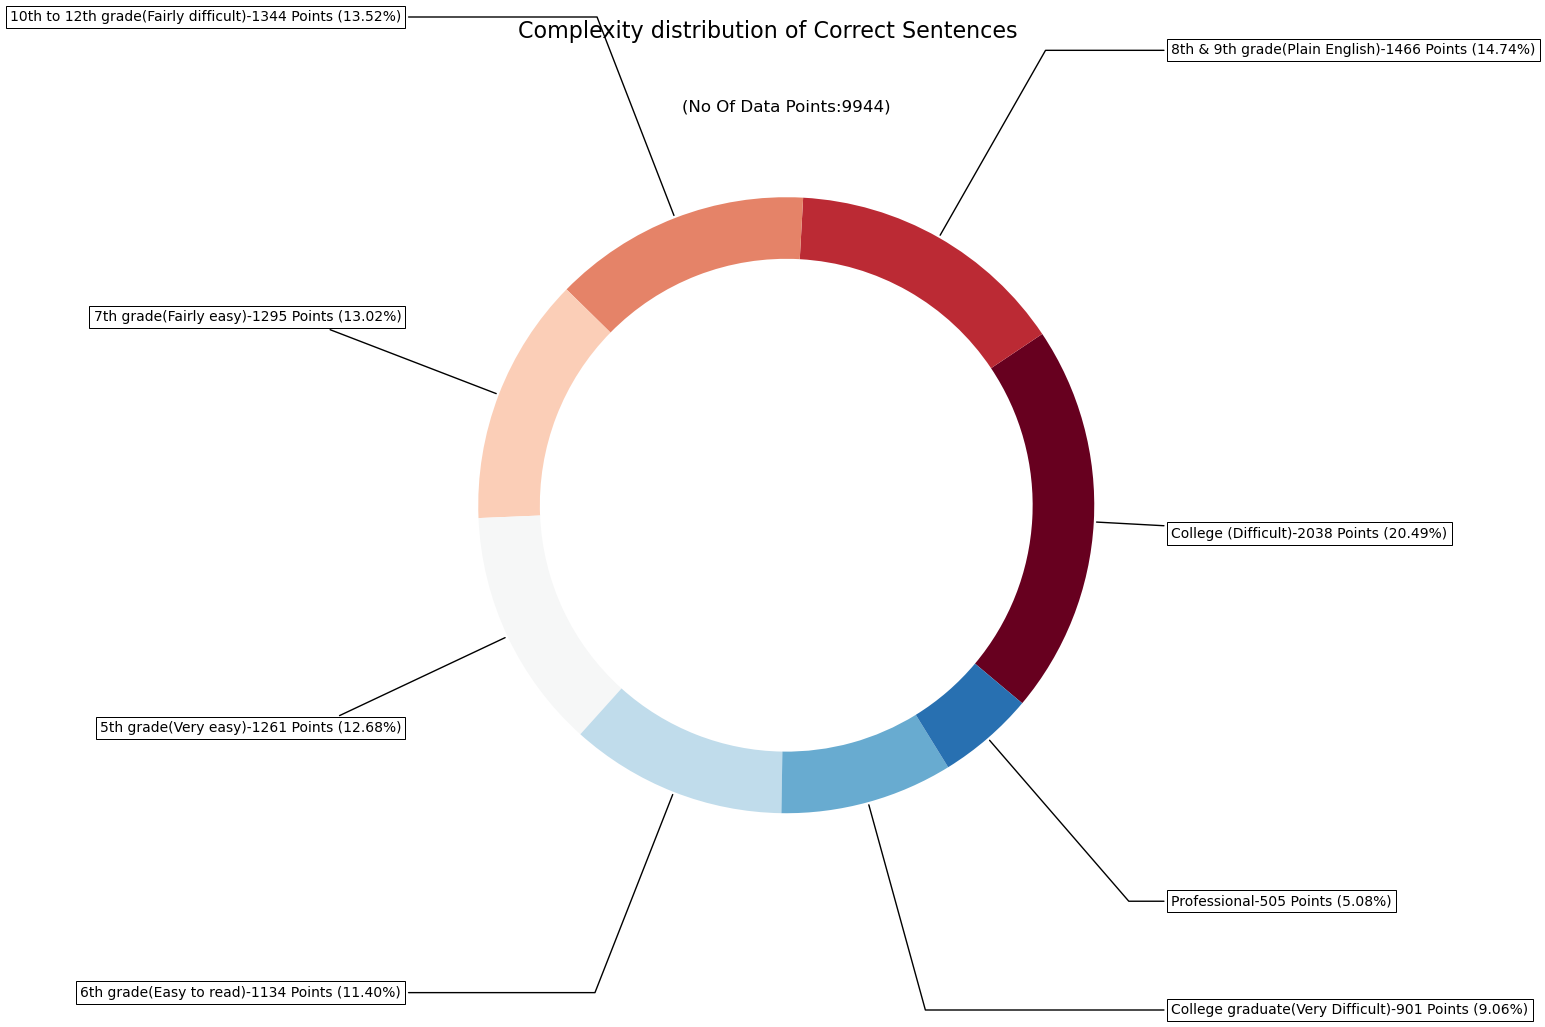

In [62]:
plot_complexity(final_df,'correct_sen_complexity',title='Complexity distribution of Correct Sentences' )

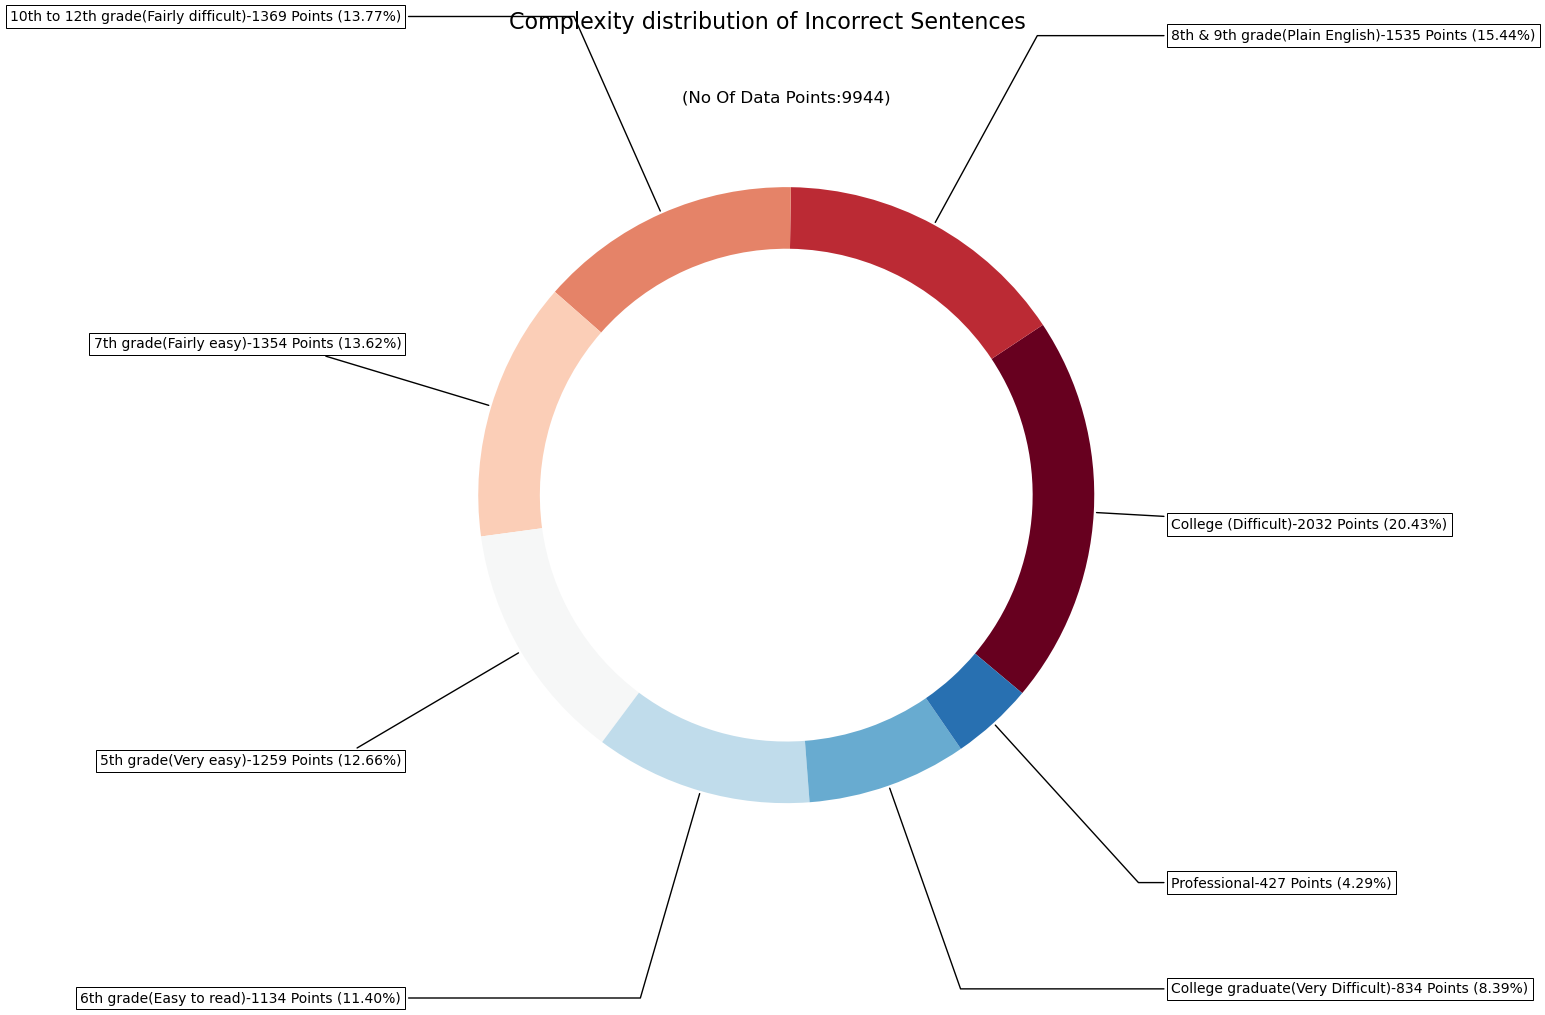

In [63]:
plot_complexity(final_df,'incorrect_sen_complexity',title='Complexity distribution of Incorrect Sentences' )

### Observations

1.   Around 67 % of the text is categorized as suitable for above 5th grade or  FRE score above 



In [64]:
final_df.to_csv('C:/Users/prash/Desktop/New_now100/data/final_with_feat_20211105.csv')

## Train Test Split

In [65]:
from sklearn.model_selection import train_test_split

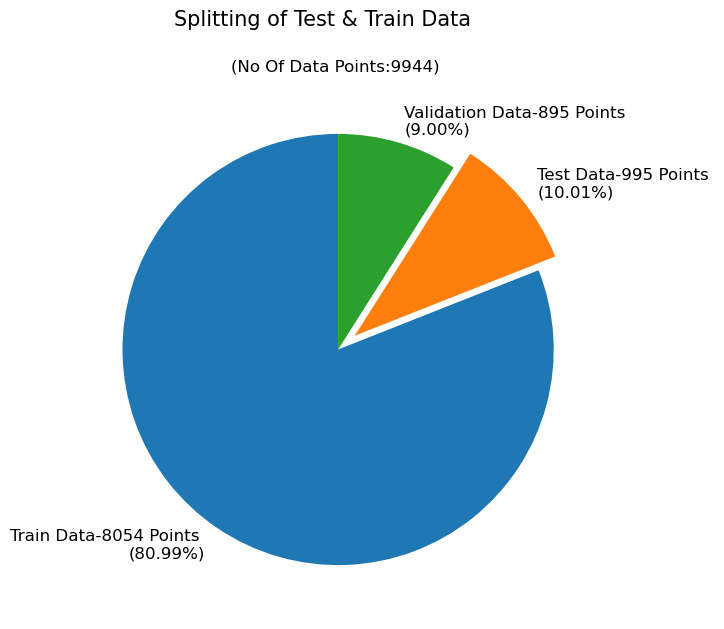

In [66]:
train,test = train_test_split(final_df, test_size=0.1)
train,validation = train_test_split(train, test_size=0.1)
fig,ax = plt.subplots(figsize =(10, 7))
labels_split = ['Train', 'Test','Validation'] 
sizes_split = [len(train),len(test),len(validation)]
pcts_split = [f'{l} Data-{s} Points \n({s*100/sum(sizes_split):.2f}%)' for s,l in zip(sizes_split, labels_split)] 
ax.pie(sizes_split, labels = pcts_split, startangle = 90, 
       explode=(0,0.1,0),textprops = {"fontsize":12} )

plt.suptitle(f'Splitting of Test & Train Data ', fontsize = 15)
plt.title(f'(No Of Data Points:{sum(sizes_split)}) ', fontsize = 12)
plt.show()

In [67]:
train.to_csv('C:/Users/prash/Desktop/New_now100/data/train_20211105')
validation.to_csv('C:/Users/prash/Desktop/New_now100/data/validation_20211105')
test.to_csv('C:/Users/prash/Desktop/New_now100/data/test_20211105')